# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Paulina Victor

<br>

## Please show and display ALL your calculations and results.


In [99]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [100]:
df = pd.read_csv('Ulta Skincare Reviews.csv')
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [101]:
df.columns

Index(['Review_Title', 'Review_Text', 'Verified_Buyer', 'Review_Date',
       'Review_Location', 'Review_Upvotes', 'Review_Downvotes', 'Product',
       'Brand', 'Scrape_Date'],
      dtype='object')

In [102]:
df['Brand'].value_counts(normalize=True)

Dermalogica    1.0
Name: Brand, dtype: float64

In [103]:
df.Product.value_counts()

Daily Superfoliant             1500
Daily Microfoliant             1500
Hydro Masque Exfoliant          800
Multi-Vitamin Thermafoliant     350
Name: Product, dtype: int64

In [104]:
df.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [105]:
df = df.dropna()

In [106]:
df.isna().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
text = df['Review_Text']
cv = CountVectorizer()
cv.fit_transform(text).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#**It can be inferred from the dataset that most buyers had skin related issues, as only dermal product was bought. Furthermore, I will also infer from the reviews that buyers were satisfied with the products**

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [109]:
from wordcloud import WordCloud

In [110]:
df.Product.value_counts(normalize=True)

Daily Superfoliant             0.361707
Daily Microfoliant             0.360984
Hydro Masque Exfoliant         0.192911
Multi-Vitamin Thermafoliant    0.084398
Name: Product, dtype: float64

In [111]:
superfoliant = ' '.join(review for review in df[df['Product'] == 'Daily Superfoliant']. Review_Text)
microfoliant = ' '.join(review for review in df[df['Product'] == 'Daily Microfoliant'].Review_Text)
hydro_masque = ' '.join(review for review in df[df['Product'] == 'Hydro Masque Exfoliant'].Review_Text)
multi_vitamin = ' '.join(review for review in df[df['Product'] == 'Multi-Vitamin Thermafoliant'].Review_Text)

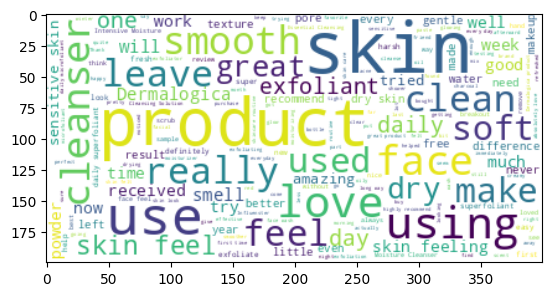

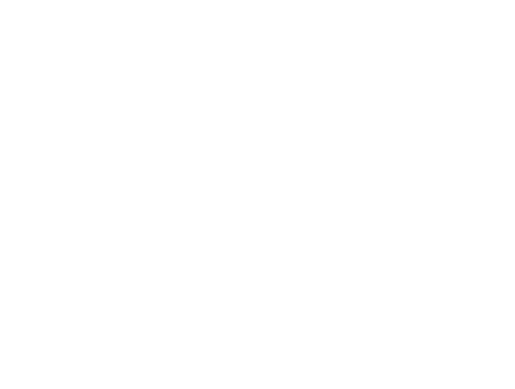

In [112]:
wd_superfoliant = WordCloud(background_color = 'white').generate(superfoliant)
plt.imshow(wd_superfoliant, interpolation='bilinear')
plt.figure()
plt.axis("off")
plt.show()

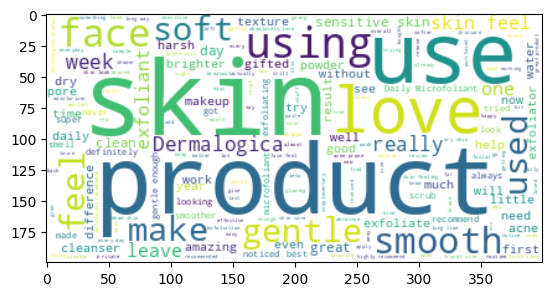

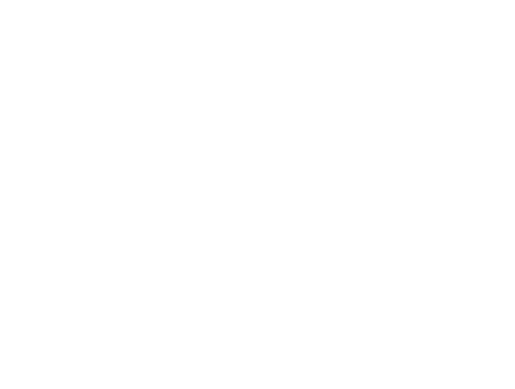

In [113]:
wd_microfoliant = WordCloud(background_color = 'white').generate(microfoliant)
plt.imshow(wd_microfoliant, interpolation='bilinear')
plt.figure()
plt.axis("off")
plt.show()

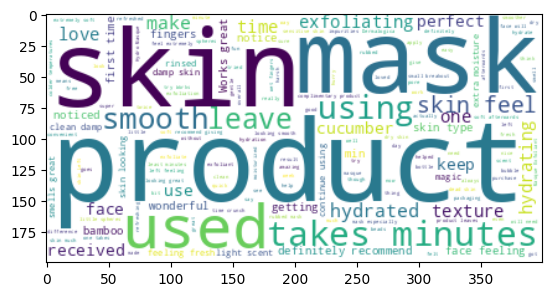

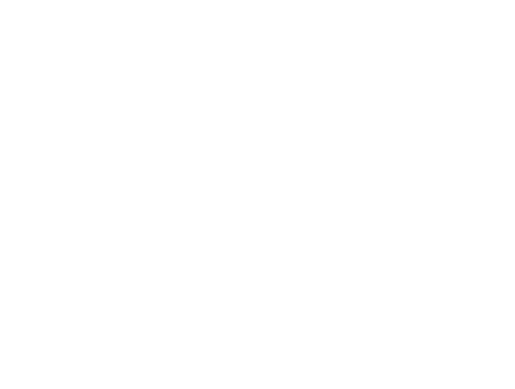

In [114]:
wd_hydro_masque = WordCloud(background_color = 'white').generate(hydro_masque)
plt.imshow(wd_hydro_masque, interpolation='bilinear')
plt.figure()
plt.axis("off")
plt.show()

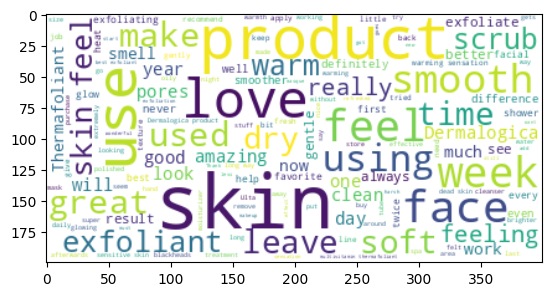

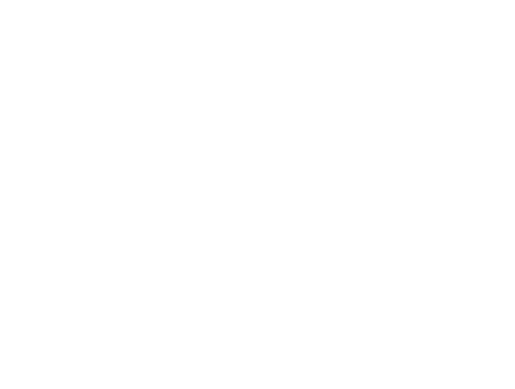

In [115]:
wd_multi_vitamin = WordCloud(background_color = 'white').generate(multi_vitamin)
plt.imshow(wd_multi_vitamin, interpolation='bilinear')
plt.figure()
plt.axis("off")
plt.show()

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [116]:
#df1 = df.copy()
text = df['Review_Text']
cv = CountVectorizer()
cv.fit_transform(text).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [118]:
import nltk

In [119]:
col_names = [name for name in dict(sorted(cv.vocabulary_.items(), key=lambda x: x[1]))]
df1 = pd.DataFrame(cv.fit_transform(text).toarray(), columns=col_names)

df1.sample(n=10)

,025,05,10,100,100x,10s,10x,12,120,12th,13,14,15,15yrs,16,1802,18mo,1st,1x,20,200,2017,2018,2023,20s,20yrs,21,23,24,25,29,2mins,2nd,2times,2x,30,30s,31,32,35,37,3am,3hours,3months,3oz,3rd,3times,3x,40,41,42,43,44,45,47,48,4mm,4th,4x,4xs,50,500,50sec,51,53,54,55,58,59,5min,5th,5x,60,62,63,69,6i,75,9oz,aa,aback,ability,abit,able,about,above,abrasive,abrasiveness,abrasives,abs,absolute,absolutely,absorb,absorbed,absorbent,absorbing,absorbs,absorption,abt,accelerated,accept,accepts,accident,accidentally,accidently,acclimate,acclimatise,accommodating,accompanied,accomplished,accutane,achieve,achieves,acid,acids,acne,acride,across,acting,action,activate,activated,activates,activating,activation,active,actively,actives,activiate,activity,acts,actual,actually,actualy,acutane,add,added,addicted,adding,addition,additional,addled,address,addressed,adds,adjust,adjusting,admit,adore,adored,ads,adsorb,adult,adults,advanced,advent,adverse,advertised,advertises,advertising,advice,advise,advised,advisor,aesthetician,afer,aferre,affair,affect,affected,affective,affects,afford,affordable,afraid,african,aftar,after,aftermath,afterward,afterwards,afterwords,again,againbecause,against,age,aged,ageing,agent,ages,agesmart,aggitate,aggravate,aggravating,aggressive,aggressively,aggrivate,agin,aging,ago,agree,agressively,aha,ahah,ahas,ahead,ahhh,ahs,aid,aided,aina,air,airport,airy,aka,albeit,ale,alergic,algae,alive,all,allantoin,allegedly,allergens,allergic,allergies,alleviate,alleviates,alll,allow,allowing,allows,almond,almost,aloe,alone,along,alongside,alot,alpha,already,alright,also,altering,alternate,alternating,alternative,alternatively,although,altitude,altogether,always,am,amaaaaaazing,amaaazing,amazamazing,amazed,amazing,amazingly,amd,american,among,amount,amounts,an,analysis,anastasia,and,anesthetist,angeles,angry,annnnnnd,annoyance,annoying,another,anount,ans,answer,answered,answering,anti,antibiotics,antioxidant,antioxidants,any,anybody,anymore,anyone,anything,anytime,anyway,anyways,anywhere,apart,ape,apparent,apparently,appealing,appeals,appear,appearance,appeared,appearing,appears,apple,application,applications,applied,applies,apply,applying,appointment,apposite,appreciate,appreciates,apprehensive,approached,approaching,appropriate,approx,approximately,apricot,aproaching,arbonne,are,area,areas,aren,areound,arm,armpits,arms,aroma,around,arrange,arrive,arrived,arrives,arsenal,artificial,artist,artists,as,asap,ash,ashes,aside,ask,asked,asking,aspect,aspects,assists,associate,assume,assumed,assuming,assumption,assure,assured,astetician,astonishing,astonishingly,astringent,aswell,at,atleast,atm,attached,attempt,attention,august,aunt,author,automatic,automatically,available,aveda,aveeno,average,avid,avoid,avoided,avoiding,aw,awake,awarded,aware,away,awesome,awful,awhile,awkward,babies,baby,babys,bac,back,backed,background,backs,backstory,backup,bacon,bacteria,bad,badescu,badly,bag,baking,balance,balanced,balancing,balls,balm,balms,bamboo,bandwagon,bang,bar,barbie,bare,barely,barnacled,barnacles,barrier,base,based,basic,basically,basis,bath,bathroom,battering,battled,battling,bay,bc,bday,be,bead,beads,bear,beard,beat,beautician,beautiful,beautifully,beautifuly,beautify,beauty,became,because,become,becomes,becoming,bed,bedridden,beds,bedtime,bee,been,bees,beeusing,before,beforehand,began,begin,beginning,begone,begun,behind,behold,being,believe,believed,believer,below,beneath,beneficial,benefit,benefited,benefits,benzoyl,besides,best,bette,better,bettet,between,beware,beyond,bha,bhas,bi,biased,bien,big,bigger,biggest,...,tissues,title,tlc,to,toasty,today,todd,toes,together,toiletry,told,tolerance,tolerate,toll,tomorrow,ton,tone,toned,toner,toners,tones,tonight,toning,tons,too,took,tool,tools,toom,tooth,toothpaste,top,topical,topicals,topped,tore,torn,total,totally,touch,touched,touches,touching,touchy,tough,tour,touts,towards,towel,towels,toxins,toâ,trace,traces,traded,trading,traditional,trail,train,trained,training,transform,transformational,trans

In [120]:
Target = "Product"
X = df["Review_Text"]
y = df[Target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
X_train.shape, X_test.shape

((3317,), (830,))

In [121]:
df["Review_Text"].head()

0                                                                                                                                                       Love using this on my face while in the shower. Heats up and gives a light scrub nicely
1                                                                                                                                                            Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother
2                                                                                                                                                                 Enjoy this product so much ! I look forward to using it - really feels great.
3    I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.
4                                       

#**Tried to solve the sentiment analysis question but just couldn't get it right.

In [122]:
from sklearn.naive_bayes import GaussianNB

In [123]:
# Build a Gaussian Classifier
#model = GaussianNB()

# Model training
#model.train(X_train, y_train)

# Predict Output
#predicted = model.predict([X_test[6]])

#print("Actual Value:", y_test[6])
#print("Predicted Value:", predicted[0])

In [124]:
from nltk import classify
from nltk import NaiveBayesClassifier
#classifier = NaiveBayesClassifier.train(X_train)

#print("Accuracy is:", classify.accuracy(classifier, X_test))

#print(classifier.show_most_informative_features(10))